# Car Price Prediction Challenge

## Loading Libraries

In [437]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 50)

In [438]:
data = pd.read_csv(r"C:\Users\Gordon Li\Desktop\car_price_prediction.csv")

### Dataset Inspection

In [439]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [440]:
print(f"Our dataset has {data.shape[0]} observations and {data.shape[1]} variables.")

Our dataset has 19237 observations and 18 variables.


In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### Data Wrangling and Cleaning

#### Deleting Duplicate Observations

Firstly, let's check if there is any duplicate variables. If there are duplicate variables, we delete them from our dataset. Duplicate data is generally bad as it increases the biasness of our data hence leading to a biased model.

In [442]:
no_duplicates = data["ID"].duplicated().sum()
print(f"There are {no_duplicates} duplicate IDs, in which we will delete.")

There are 313 duplicate IDs, in which we will delete.


In [443]:
data = data.drop_duplicates(subset="ID", keep="first")
data = data.drop(["ID"], axis=1)

#### Changing the type of the `Levy` feature

We can see there are missing values for the `Levy` feature. This is labelled as "-" and so we replace this with `np.nan`.

In [444]:
data["Levy"] = data["Levy"].replace("-", np.nan)
data["Levy"] = data["Levy"].apply(
    lambda x: x if pd.isnull(x) else int(x)
)

#### Removing the km from the `Mileage` feature

In the `Mileage` feature we can see that it is a string object variable due to a constant "km" sign. Let's remove the `km` string from the mileage feature and convert it into an int datatype.

In [445]:
data["Mileage"] = data["Mileage"].str.replace(r"km$", "", regex=True)
data["Mileage"] = data["Mileage"].astype(int)

#### Creating a new variable - `Turbo`

In [446]:
data["Turbo"] = data["Engine volume"].str.contains(pat=r"Turbo$")
data["Turbo"] = data["Turbo"].astype(int)
data["Engine volume"] = data["Engine volume"].str.replace(r" Turbo$", "", regex=True)
data["Engine volume"] = data["Engine volume"].astype(float)

#### Reformating the `Doors variable`

In [447]:
rename_values = {"02-Mar": "2-3", "04-May": "4-5"}
for old, new in rename_values.items():
    data["Doors"] = data["Doors"].replace(old, new, regex=False) 

## Exploratory Data Analysis

In [448]:
sns.set()

### Univariate Analysis

#### An analysis of our target variable

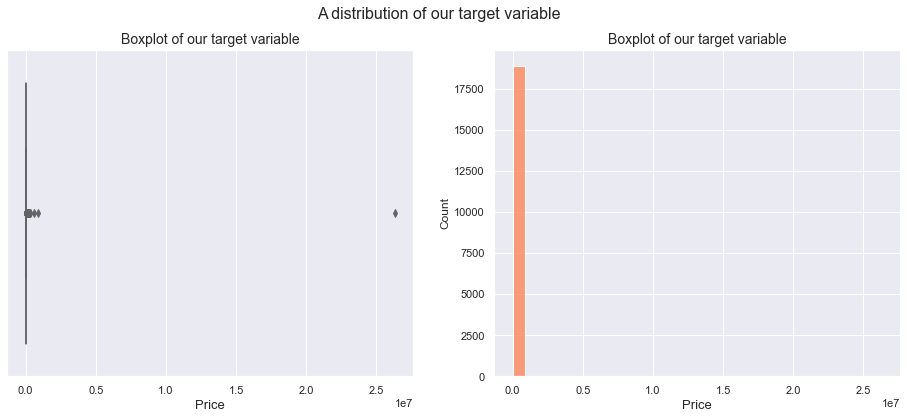

In [449]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("A distribution of our target variable", fontsize=16)
sns.boxplot(data=data, x="Price", ax=axs[0], color="coral")
axs[0].set_title("Boxplot of our target variable", fontsize=14)
axs[0].set_xlabel("Price", fontsize=13)
sns.histplot(data=data, x="Price", bins=30, ax=axs[1], color="coral")
axs[1].set_title("Boxplot of our target variable", fontsize=14)
axs[1].set_xlabel("Price", fontsize=13)
plt.show()

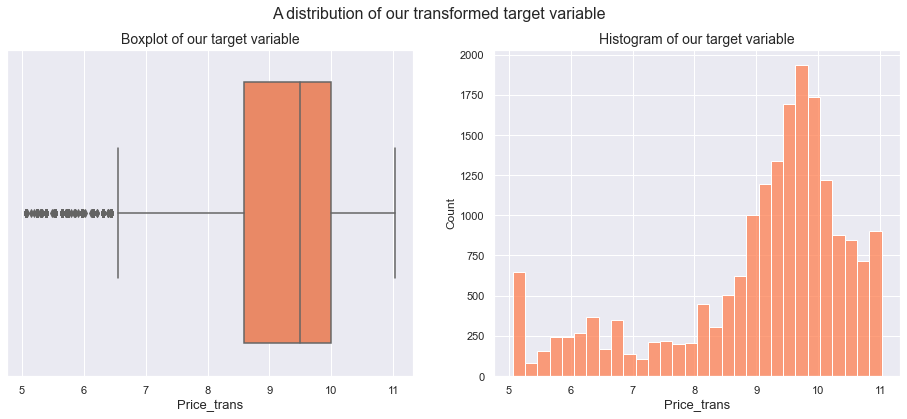

In [517]:
transformed_data = np.log1p(data["Price"])
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("A distribution of our transformed target variable", fontsize=16)

transformed_data = pd.Series(transformed_data)
lower_limit = transformed_data.quantile(0.025)
upper_limit = transformed_data.quantile(0.975)

transformed_feature = transformed_data.apply(
    lambda x: upper_limit if x > upper_limit \
        else (lower_limit if x < lower_limit
            else x)
)

sns.boxplot(x=transformed_feature, ax=axs[0], color="coral")
axs[0].set_title("Boxplot of our target variable", fontsize=14)
axs[0].set_xlabel("Price_trans", fontsize=13)
sns.histplot(data=data, x=transformed_feature, bins=30, ax=axs[1], color="coral")
axs[1].set_title("Histogram of our target variable", fontsize=14)
axs[1].set_xlabel("Price_trans", fontsize=13)
plt.show()

In [451]:
data["Price_trans"] = transformed_feature
data["Price"] = np.expm1(data["Price_trans"])

#### A look at our numeric features

In [452]:
numeric_features = ["Levy", "Prod. year", "Mileage", "Cylinders", "Airbags", "Engine volume"]

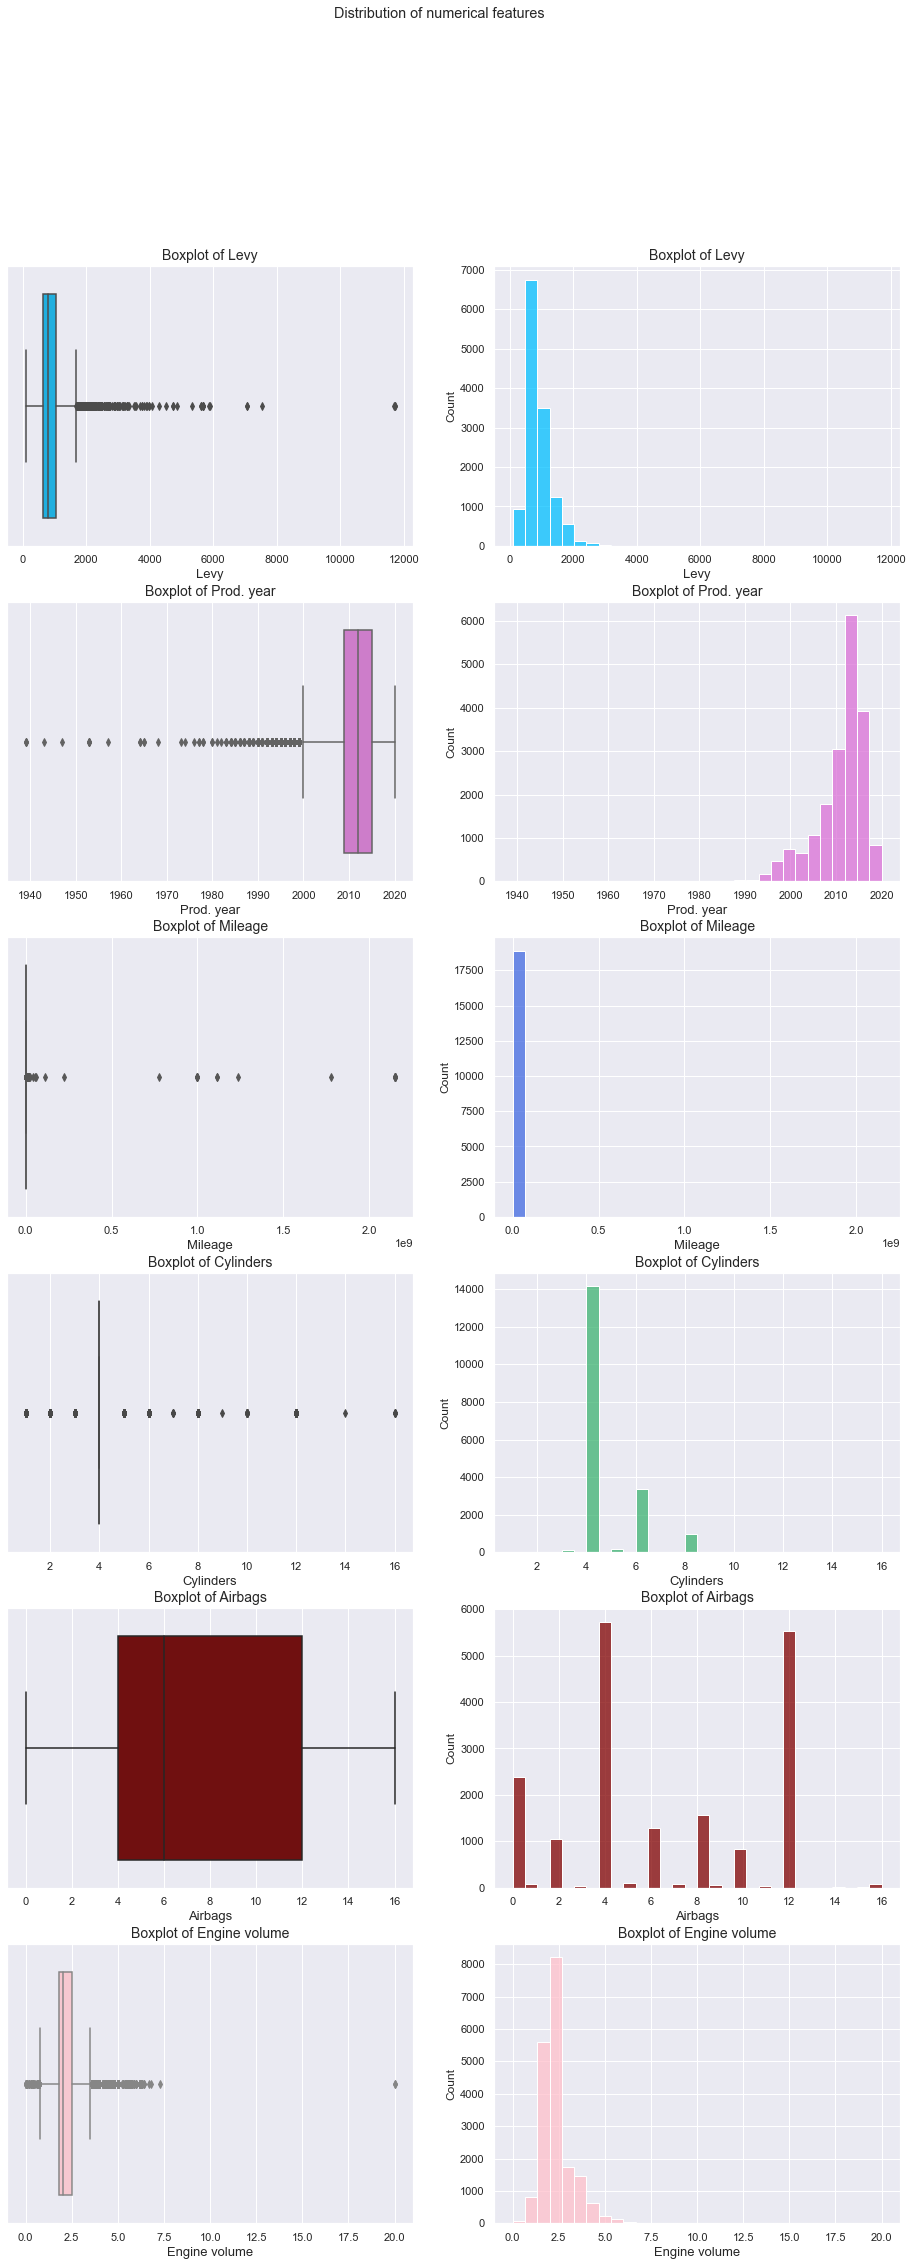

In [453]:
colors = ["deepskyblue", "orchid", "royalblue", "mediumseagreen", "maroon", "pink"]
fig, axs = plt.subplots(6, 2, figsize=(16, 36))
fig.suptitle("Distribution of numerical features")
for i, (feature, color) in enumerate(zip(numeric_features, colors)): 
    sns.boxplot(data=data, x=feature, ax=axs[i, 0], color=color)
    axs[i, 0].set_title(f"Boxplot of {feature}", fontsize=14)
    axs[i, 0].set_xlabel(feature, fontsize=13)
    sns.histplot(data=data, x=feature, ax=axs[i, 1], bins=30, color=color)
    axs[i, 1].set_title(f"Boxplot of {feature}", fontsize=14)
    axs[i, 1].set_xlabel(feature, fontsize=13)
plt.show()

##### Outlier Analysis

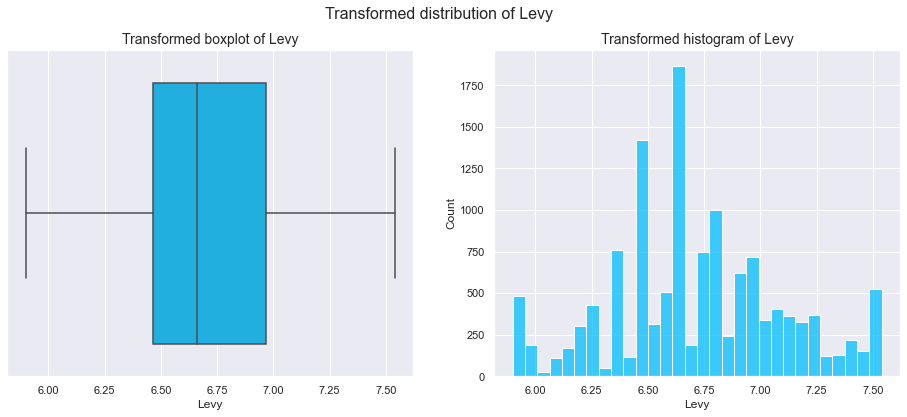

In [456]:
transformed_data = np.log1p(data["Levy"])
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle("Transformed distribution of Levy", fontsize=16)
mean = transformed_data.mean()
std = transformed_data.std()

lower_limit = mean - 1.96 * std
upper_limit = mean + 1.96 * std

transformed_feature_levy = transformed_data.apply(
    lambda x: upper_limit if x > upper_limit \
        else (lower_limit if x < lower_limit
            else x)
)
sns.boxplot(x=transformed_feature_levy, ax=axs[0], color="deepskyblue")
axs[0].set_title("Transformed boxplot of Levy", fontsize=14)
axs[1].set_title("Transformed histogram of Levy", fontsize=14)
sns.histplot(data=data, x=transformed_feature_levy, bins=30, ax=axs[1], color="deepskyblue")
plt.show()

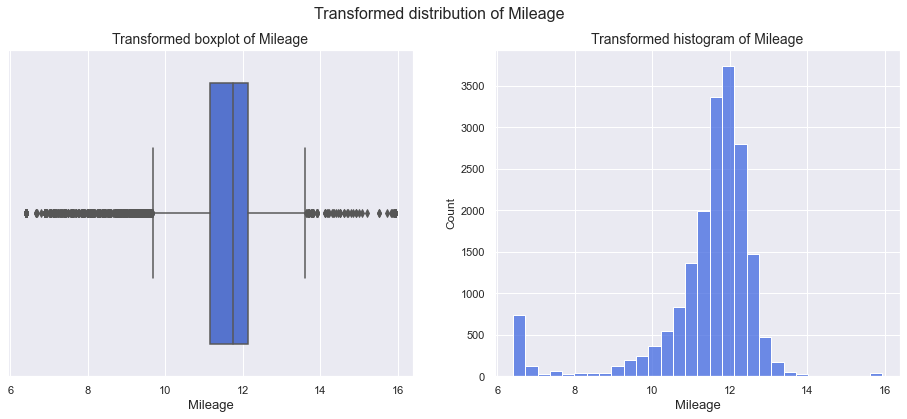

In [460]:
transformed_data = np.log1p(data["Mileage"])
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Transformed distribution of Mileage", fontsize=16)

mean = transformed_data.mean()
std = transformed_data.std()

lower_limit = mean - 1.96 * std
upper_limit = mean + 1.96 * std

transformed_feature_mileage = transformed_data.apply(
    lambda x: upper_limit if x > upper_limit \
        else (lower_limit if x < lower_limit
            else x)
)
sns.boxplot(x=transformed_feature_mileage, ax=axs[0], color="royalblue")
axs[0].set_title("Transformed boxplot of Mileage", fontsize=14)
axs[1].set_title("Transformed histogram of Mileage", fontsize=14)
axs[0].set_xlabel("Mileage", fontsize=13)
axs[1].set_xlabel("Mileage", fontsize=13)
sns.histplot(data=data, x=transformed_feature_mileage, bins=30, ax=axs[1], color="royalblue")
plt.show()

In [461]:
data["Mileage"] = transformed_feature_mileage
data["Levy"] = transformed_feature_levy

#### A look at our categorical features

##### Categorical Features that have less than 10 unique values

In [463]:
cat_l10 = [
    "Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel", "Turbo"
]

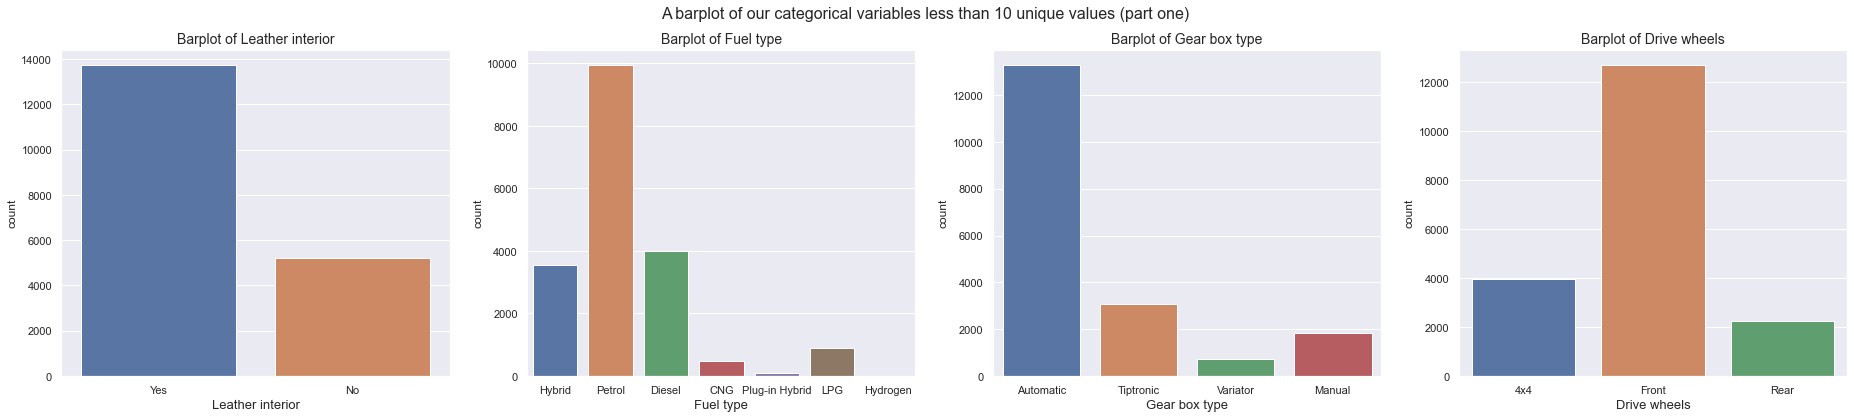

In [469]:
fig, axs = plt.subplots(1, 4, figsize=(32, 6))
fig.suptitle("A barplot of our categorical variables less than 10 unique values (part one)", fontsize=16)
for i, feature in enumerate(cat_l10[:4]): 
    axs[i].set_title(f"Barplot of {feature}", fontsize=14)
    axs[i].set_xlabel(feature, fontsize=13)
    sns.countplot(data=data, x=feature, palette="deep", ax=axs[i])

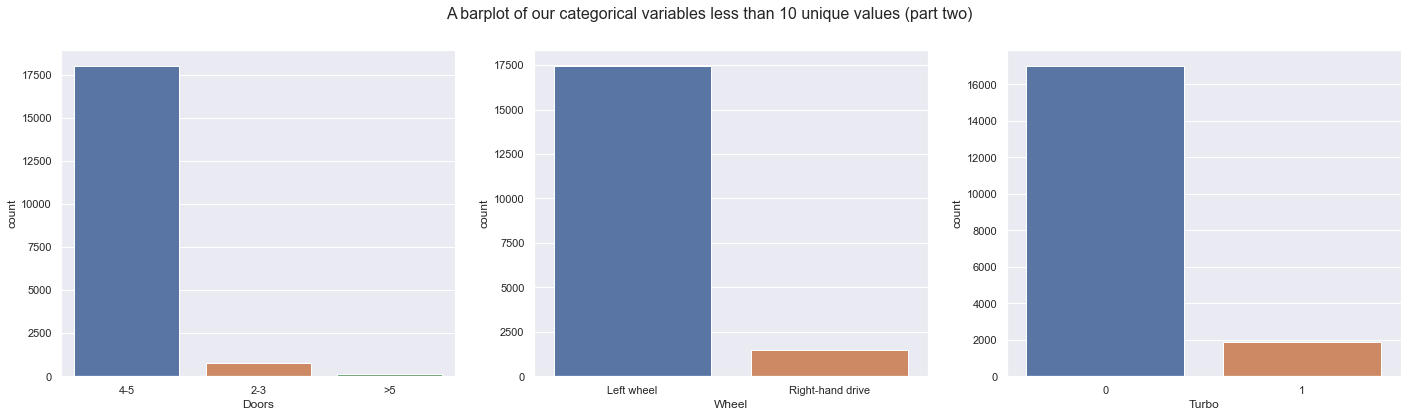

In [470]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle("A barplot of our categorical variables less than 10 unique values (part two)", fontsize=16)
for i, feature in enumerate(cat_l10[4:]): 
    sns.countplot(data=data, x=feature, palette="deep", ax=axs[i])

##### Categorical Features more than 10 unique values

In [168]:
cat_u10 = ["Manufacturer", "Model", "Category", "Color"]

In [499]:
data_value_counts_final

,Color,Count
0,Black,4944
1,White,4407
2,Silver,3729
3,Grey,2343
4,Blue,1376
5,Red,622
6,Green,321
7,Orange,252
8,Brown,185
9,Others,568


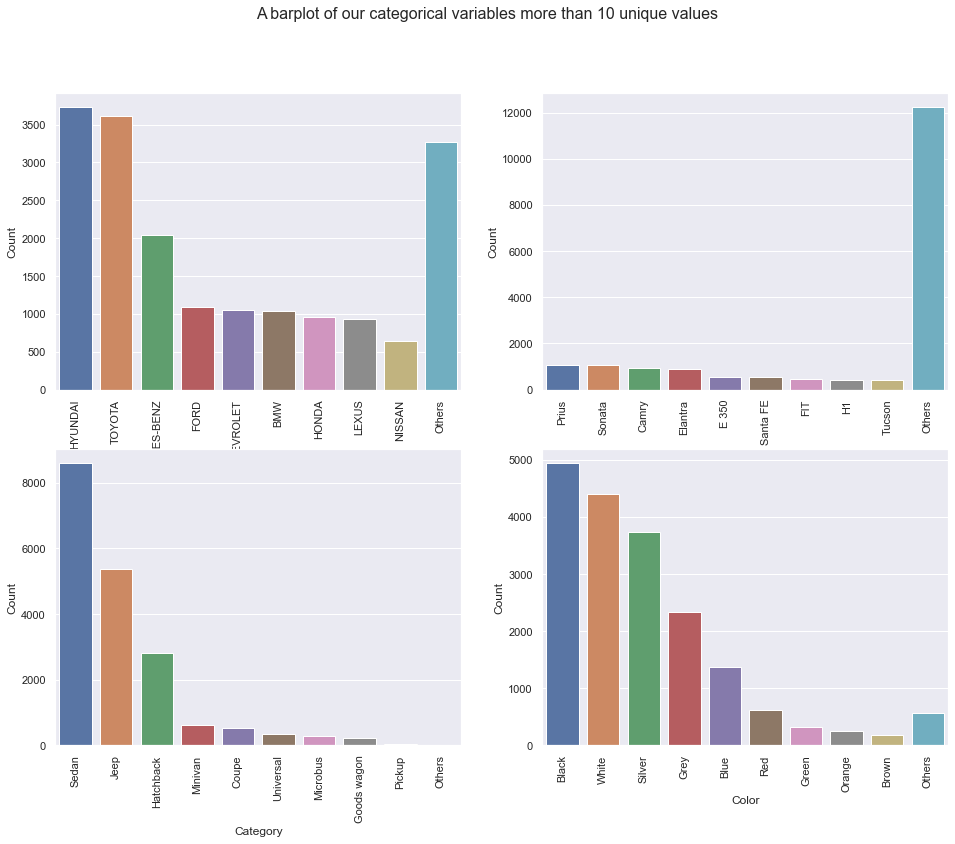

In [501]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("A barplot of our categorical variables more than 10 unique values", fontsize=16)
axs = axs.ravel()
for i, feature in enumerate(cat_u10):
    rename_dict = {"count": "Count"}
    value_counts = data[feature].value_counts()
    value_counts_other = value_counts[10:].sum()
    some_dict = {feature: "Others", "Count": value_counts_other}
    new_row = pd.Series({feature: "Others", "Count": value_counts_other})
    top_10_counts = value_counts[:9].reset_index().rename(columns=rename_dict)
    data_value_counts_final = pd.concat([top_10_counts, new_row.to_frame().T], ignore_index=True)
    sns.barplot(data=data_value_counts_final, x=feature, y="Count", ax=axs[i], palette="deep")
    axs[i].set_xticklabels(data_value_counts_final[feature], rotation=90)
plt.show()

### Bivariate Analysis - Interaction between features and transformed target variables

#### Some select plots of numeric features

##### Production Year

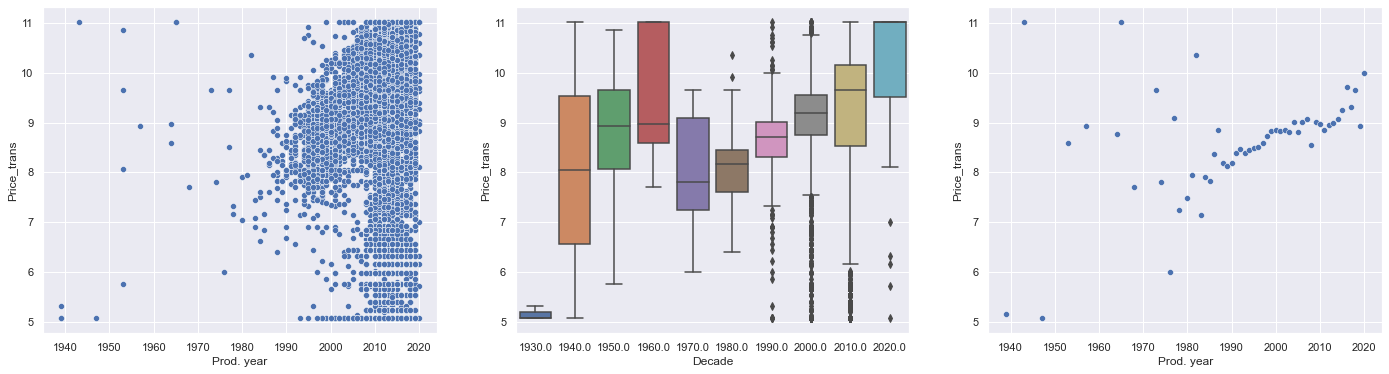

In [170]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

sns.scatterplot(data=data, x="Prod. year", y="Price_trans", ax=axs[0])

data_year_price = data[["Prod. year", "Price_trans"]].copy()

data_year_price["Decade"] = 10 * np.floor(data["Prod. year"]/10)

sns.boxplot(data=data_year_price, x="Decade", y="Price_trans", ax=axs[1])

target_year_gb = data[["Prod. year", "Price_trans"]].groupby(by="Prod. year").mean()
target_year_gb = target_year_gb.reset_index()
sns.scatterplot(data=target_year_gb, x="Prod. year", y="Price_trans", ax=axs[2])

plt.show()

##### Cylinders

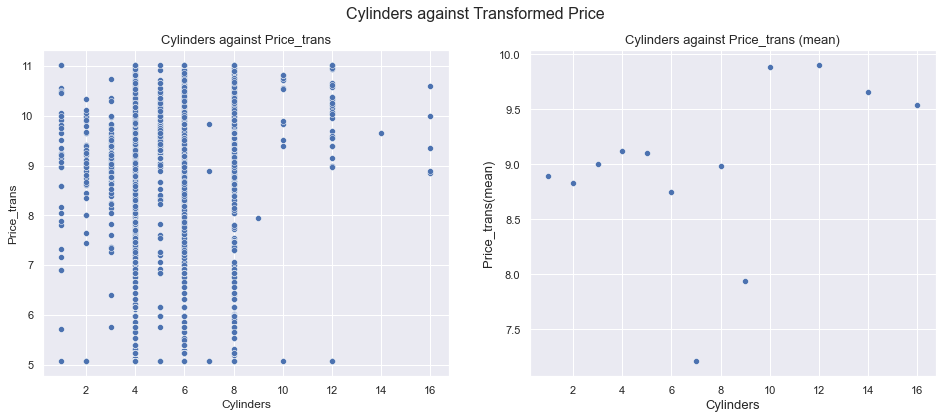

In [515]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Cylinders against Transformed Price", fontsize=16)
sns.scatterplot(data=data, x="Cylinders", y="Price_trans", ax=axs[0])
axs[0].set_title("Cylinders against Price_trans", fontsize=13)
target_cylinder_gb = data[["Cylinders", "Price_trans"]].groupby(by="Cylinders").mean()
target_cylinder_gb = target_cylinder_gb.reset_index()
sns.scatterplot(data=target_cylinder_gb, x="Cylinders", y="Price_trans", ax=axs[1])
axs[1].set_title("Cylinders against Price_trans (mean)", fontsize=13)
axs[1].set_xlabel("Cylinders", fontsize=13)
axs[1].set_ylabel("Price_trans(mean)", fontsize=13)
plt.show()

##### Airbags

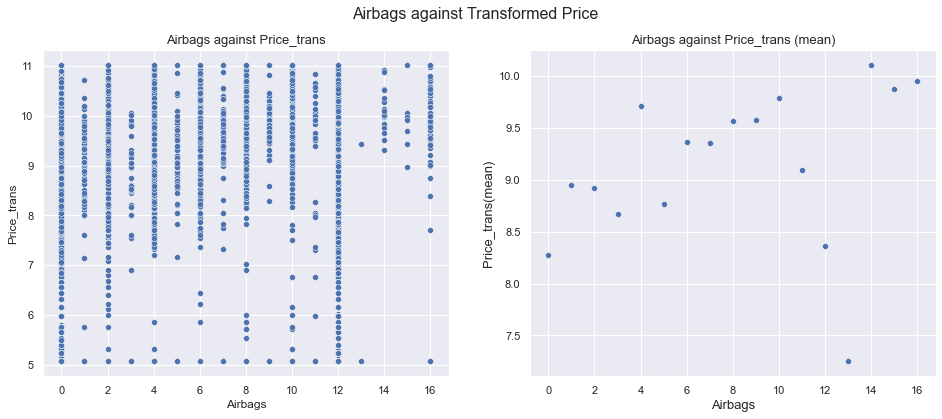

In [512]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Airbags against Transformed Price", fontsize=16)
axs[0].set_title("Airbags against Price_trans", fontsize=13)
sns.scatterplot(data=data, x="Airbags", y="Price_trans", ax=axs[0])
target_cylinder_gb = data[["Airbags", "Price_trans"]].groupby(by="Airbags").mean()
target_cylinder_gb = target_cylinder_gb.reset_index()
axs[1].set_title("Airbags against Price_trans (mean)", fontsize=13)
axs[1].set_xlabel("Airbags", fontsize=13)
axs[1].set_ylabel("Price_trans(mean)", fontsize=13)
sns.scatterplot(data=target_cylinder_gb, x="Airbags", y="Price_trans", ax=axs[1])
plt.show()

##### Mileage

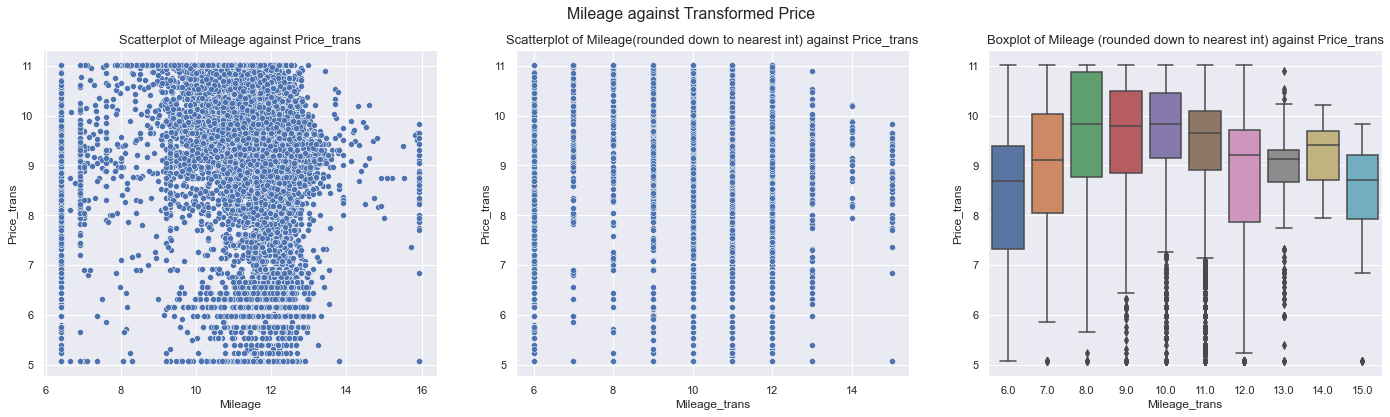

In [513]:
data_mileage_price = data[["Mileage", "Price_trans"]].copy()
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle("Mileage against Transformed Price", fontsize=16)
sns.scatterplot(data=data_mileage_price, x="Mileage", y="Price_trans", ax=axs[0])
axs[0].set_title("Scatterplot of Mileage against Price_trans", fontsize=13)
data_mileage_price["Mileage_trans"] = np.floor(data["Mileage"])
sns.scatterplot(data=data_mileage_price, x="Mileage_trans", y="Price_trans", ax=axs[1])
axs[1].set_title("Scatterplot of Mileage(rounded down to nearest int) against Price_trans", fontsize=13)
sns.boxplot(data=data_mileage_price, x="Mileage_trans", y="Price_trans", ax=axs[2])
axs[2].set_title("Boxplot of Mileage (rounded down to nearest int) against Price_trans", fontsize=13)
plt.show()

#### Categorical Features

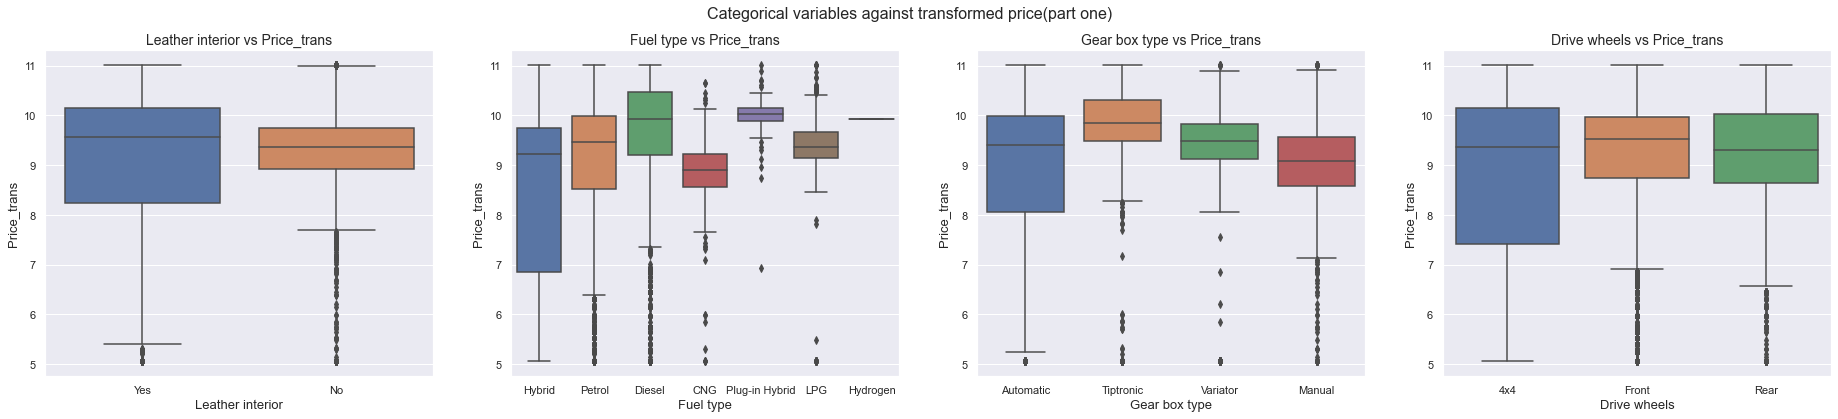

In [494]:
fig, axs = plt.subplots(1, 4, figsize=(32, 6))
fig.suptitle("Categorical variables against transformed price(part one)", fontsize=16)
for i, feature in enumerate(cat_l10[:4]): 
    sns.boxplot(data=data, x=feature, y="Price_trans", palette="deep", ax=axs[i])
    axs[i].set_title(f"{feature} vs Price_trans", fontsize=14)
    axs[i].set_xlabel(f"{feature}", fontsize=13)
    axs[i].set_ylabel(f"Price_trans", fontsize=13)

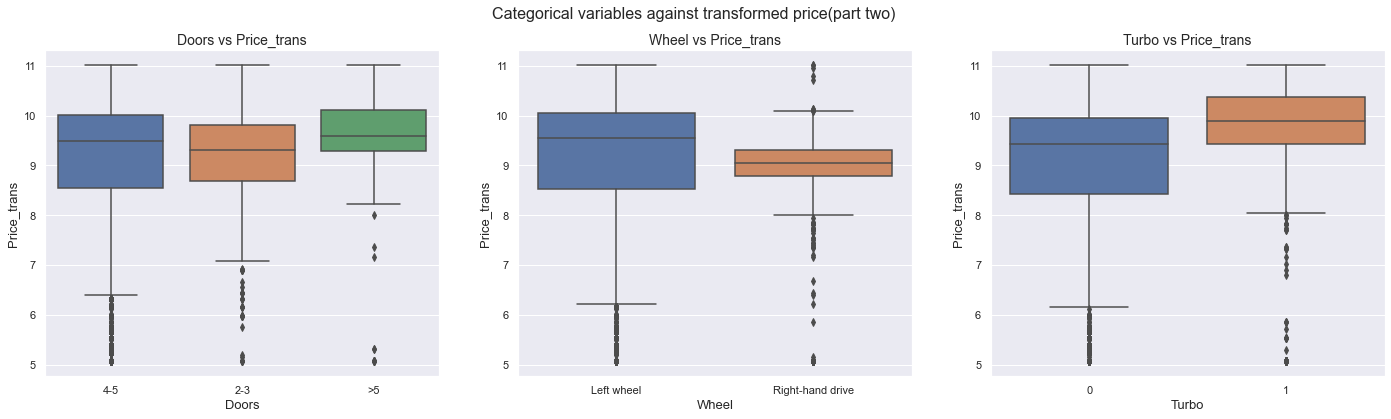

In [496]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle("Categorical variables against transformed price(part two)", fontsize=16)
for i, feature in enumerate(cat_l10[4:]): 
    sns.boxplot(data=data, x=feature, y="Price_trans", palette="deep", ax=axs[i])
    axs[i].set_title(f"{feature} vs Price_trans", fontsize=14)
    axs[i].set_xlabel(f"{feature}", fontsize=13)
    axs[i].set_ylabel(f"Price_trans", fontsize=13)

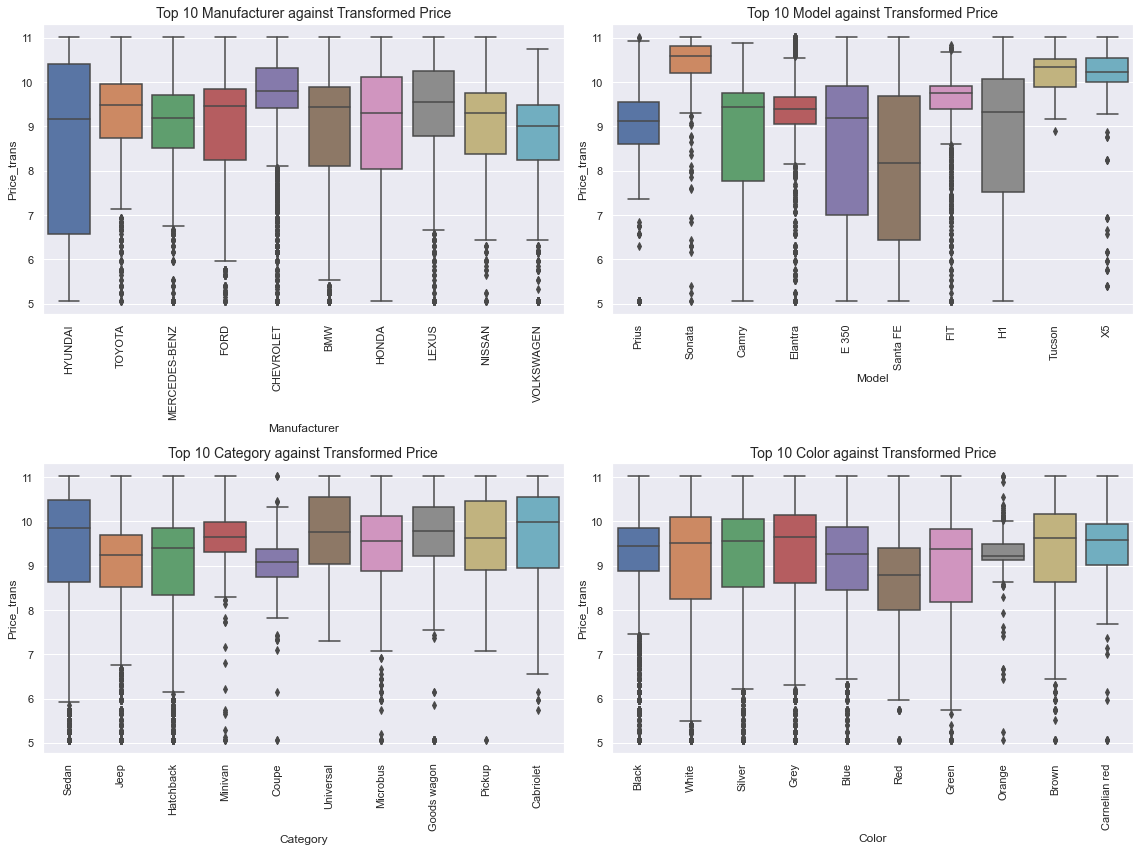

In [487]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.ravel()
for i, feature in enumerate(cat_u10): 
    top_10_vc = list(data[feature].value_counts()[:10].index)
    data_feature_price = data[data[feature].isin(top_10_vc)][[feature, "Price_trans"]]
    sns.boxplot(data=data_feature_price, x=feature, y="Price_trans", palette="deep", ax=axs[i])
    axs[i].set_xticklabels(top_10_vc, rotation=90)
    axs[i].set_title(f"Top 10 {feature} against Transformed Price", fontsize=14)
plt.tight_layout()
plt.show()

In [177]:
data_manufacturer_price = data[["Manufacturer", "Price_trans"]].copy()
data_manufacturer_price_gb = data_manufacturer_price.groupby("Manufacturer").mean()
most_exp_manufacturers = data_manufacturer_price_gb.sort_values(by="Price_trans", ascending=False).index[:10]
cheapest_manufacturers = data_manufacturer_price_gb.sort_values(by="Price_trans", ascending=False).index[-10:]
manufacturers_data = pd.DataFrame({
    "Rank": [i for i in range(1, 11)],
    "Cheapest": cheapest_manufacturers,
    "Most Exp": most_exp_manufacturers,
})
manufacturers_data

,Rank,Cheapest,Most Exp
0,1,SEAT,BENTLEY
1,2,DAIHATSU,LAMBORGHINI
2,3,MAZDA,ASTON MARTIN
3,4,GMC,TESLA
4,5,VAZ,FERRARI
5,6,ZAZ,LAND ROVER
6,7,ROVER,SSANGYONG
7,8,ACURA,PORSCHE
8,9,MOSKVICH,SCION
9,10,ROLLS-ROYCE,სხვა


In [178]:
data_model_price = data[["Model", "Price_trans"]].copy()
data_model_price_gb = data_model_price.groupby("Model").mean()
most_exp_model = data_model_price_gb.sort_values(by="Price_trans", ascending=False).index[:10]
cheapest_model = data_model_price_gb.sort_values(by="Price_trans", ascending=False).index[-10:]
model_data = pd.DataFrame({
    "Rank": [i for i in range(1, 11)],
    "Cheapest": cheapest_model,
    "Most Exp": most_exp_model,
})
model_data

,Rank,Cheapest,Most Exp
0,1,S 55 5.5,GLS 450
1,2,Mark X Zio,Tacoma TRD Off Road
2,3,Sprinter VIP CLASS,Crafter 2.5 TDI
3,4,Sai,Defender 90 Cabrio
4,5,Sprinter სატვირთო,650 450 HP
5,6,340,640 M
6,7,Corolla 140,640 GRAN-COUPE
7,8,TL saber,630
8,9,CRX,Jimny GLX
9,10,IX35 2.0,535 Diesel


### A correlation heatmap

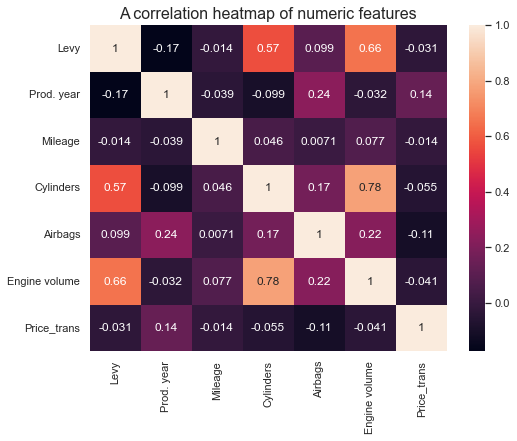

In [385]:
plt.figure(figsize=(8, 6))
correlations = data[numeric_features + ["Price_trans"]].corr()
sns.heatmap(correlations, annot=True)
plt.title("A correlation heatmap of numeric features", fontsize=16)
plt.show()

In [188]:
assert(len(data.columns) == len(numeric_features) + len(cat_l10) + len(cat_u10) + 2)

## Data Preprocessing

### Removing Observations with `Fuel Type` of hydrogen

In [189]:
data[data["Fuel type"] == "Hydrogen"]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Price_trans
12900,20385.0,NaN,HYUNDAI,Sonata Hybrid,2012,Sedan,Yes,Hydrogen,2.4,11.668227,6.0,Tiptronic,Front,4-5,Left wheel,Grey,8,0,9.922604


We can see there is only one observation that have a `Fuel type` of hydrogen. As an outlier, it is very hard to train our machine learning model with this observation. Therefore we will remove this observation from our dataset.

In [190]:
data = data.drop(index=12900)

### Condensing information for `Manufacturer`

In [191]:
value_counts = data["Manufacturer"].value_counts().reset_index()
value_counts_l10 = value_counts[value_counts["count"] <= 1]
manufacturer_list = value_counts_l10["Manufacturer"].tolist()
print("The number of manufacturers that have less than or equal to 1 car is", len(manufacturer_list))

The number of manufacturers that have less than or equal to 1 car is 8


In [192]:
indexes = list(data[data["Manufacturer"].isin(manufacturer_list)].index)
for i in indexes: 
    data.loc[i, "Manufacturer"] = "OTHER"

### Condensing information for `Model`

In [193]:
value_counts = data["Model"].value_counts().reset_index()
value_counts_l5 = value_counts[value_counts["count"] <= 3]
count_lower = value_counts_l5.shape[0]
total_count = data["Model"].nunique()
print(f"The percentage of model names that are up to 3 observations is {round(count_lower*100/total_count, 2)}%.")

The percentage of model names that are up to 3 observations is 76.67%.


In [194]:
model_list = value_counts_l5["Model"].tolist()

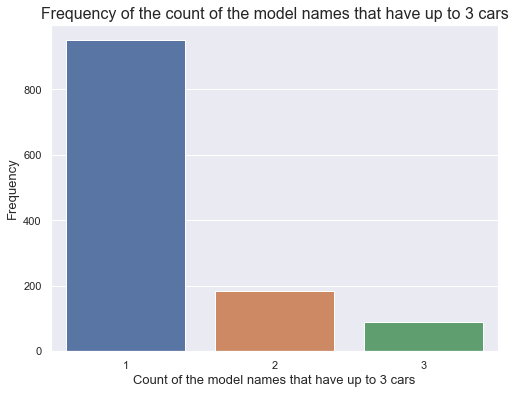

In [386]:
plt.figure(figsize=(8, 6))
sns.countplot(data=value_counts_l5, x="count", palette="deep")
plt.title("Frequency of the count of the model names that have up to 3 cars", fontsize=16)
plt.xlabel("Count of the model names that have up to 3 cars", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.show()

In [196]:
indexes = list(data[data["Model"].isin(model_list)].index)
for i in indexes: 
    data.loc[i, "Model"] = "OTHER"

### Encoding of Categorical variables

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

one_hot = cat_l10[1:4] + cat_u10 
ordinal_encode = [cat_l10[0], cat_l10[4], cat_l10[5]]

categories = [["No", "Yes"], ["2-3", "4-5", ">5"], ["Left wheel", "Right-hand drive"]]

ct_encoding = ColumnTransformer(
    transformers = [
        ("categorical_encoder", OneHotEncoder(sparse_output=False), one_hot),
        ("ordinal_encoder", OrdinalEncoder(categories=categories), ordinal_encode)
    ],
    remainder = "passthrough", verbose_feature_names_out=False
)

data = pd.DataFrame(ct_encoding.fit_transform(data), columns=ct_encoding.get_feature_names_out())

In [198]:
print(f"There are {data.shape[1]} variables.")

There are 482 variables.


### Splitting our into train and test sets

In [199]:
X = data.drop(["Price_trans", "Price"], axis=1)
y = data[["Price_trans", "Price"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13
)

### Imputing Values and standardising data

#### Imputing values

In [200]:
rename_dict = {"index": "Feature", 0: "Missing Count"}
missing_data = data.isna().sum().reset_index().rename(rename_dict, axis=1)
missing_data_sorted = missing_data.sort_values(by="Missing Count", ascending=False).reset_index()
del missing_data_sorted["index"]
missing_data_sorted.head()

,Feature,Missing Count
0,Levy,5708
1,Fuel type_CNG,0
2,Model_Mazda 3,0
3,Model_Note,0
4,Model_Niro,0


We can see that only our feature of `Levy` has a missing count of 5708. To impute this we will use the `KNNImputer`. An example of this is: 

In [201]:
from sklearn.impute import KNNImputer
def knn_imputer_fit(neighbors, X_train, X_test):
    X_train_columns = list(X_train.columns)
    X_test_columns = list(X_test.columns)
    knn_imputer = KNNImputer(n_neighbors=neighbors)
    knn_imputer.fit(X_train)

    X_train_trans_np = knn_imputer.transform(X_train)
    X_train_trans = pd.DataFrame(X_train_trans_np, columns=X_train_columns)
    X_test_trans_np = knn_imputer.transform(X_test)
    X_test_trans = pd.DataFrame(X_test_trans_np, columns=X_test_columns)
    return X_train_trans, X_test_trans

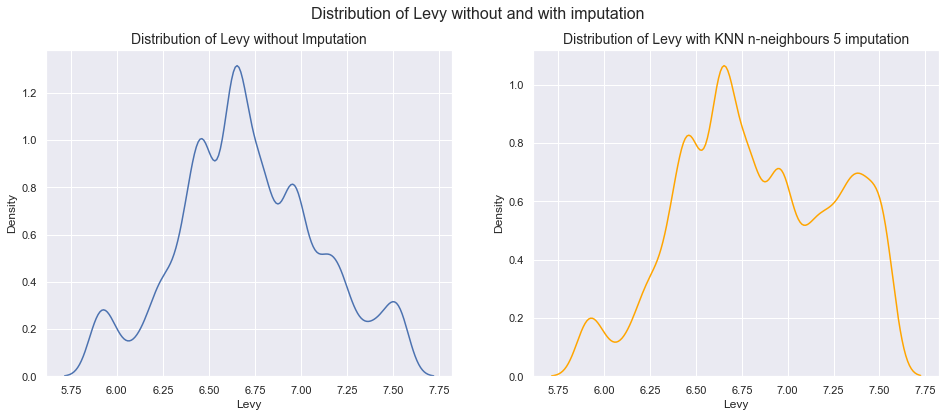

In [203]:
X_train_trans, X_test_trans = knn_imputer_fit(5, X_train, X_test)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))  
fig.suptitle("Distribution of Levy without and with imputation", fontsize=16)
sns.kdeplot(data=X_train, x="Levy", ax=axs[0])
axs[0].set_title("Distribution of Levy without Imputation", fontsize=14)
sns.kdeplot(data=X_train_trans, x="Levy", ax=axs[1], c="orange")
axs[1].set_title("Distribution of Levy with KNN n-neighbours 5 imputation", fontsize=14)
plt.show()

Note we can also use impute the missing values with 0 or the median of `Levy`.

#### Standardising Data

In [204]:
from sklearn.preprocessing import StandardScaler

def standardise_data(X_train, X_test):
    ct_standard_scaler = ColumnTransformer(
        transformers = [ 
            ("standard_scaler", StandardScaler(), numeric_features)
        ],
        remainder = "passthrough", verbose_feature_names_out=False
    )
    ct_standard_scaler.fit(X_train)
    X_train_trans = pd.DataFrame(ct_standard_scaler.transform(X_train), columns=ct_standard_scaler.get_feature_names_out())
    X_test_trans = pd.DataFrame(ct_standard_scaler.transform(X_test), columns=ct_standard_scaler.get_feature_names_out())
    return X_train_trans, X_test_trans

Let us test if the the `StandardScaler` does as required.

In [205]:
X_train_trans, X_test_trans = standardise_data(X_train, X_test)
X_train_trans[numeric_features].describe().loc[["mean", "std"]]

,Levy,Prod. year,Mileage,Cylinders,Airbags,Engine volume
mean,-4.797652e-13,1.182869e-14,7.675684e-15,-2.217943e-16,3.855115e-17,6.448506e-14
std,1.000051e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00


#### A look at our initial machine learning model random forests

In [206]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [207]:
def random_forest_model(X_train, y_train, X_test, y_test, verbose): 
    random_forest_model = RandomForestRegressor(random_state=13, n_jobs=-1, verbose=verbose)
    random_forest_model.fit(X_train, y_train["Price_trans"])
    
    y_transformed_pred = random_forest_model.predict(X_test)
    y_pred = np.expm1(y_transformed_pred)
    
    mse = mean_squared_error(y_pred, y_test["Price"])
    return mse    

#### Putting it altogether

In [208]:
from sklearn.model_selection import KFold

In [209]:
impute_dict = {}
impute_type, value, mses = [], [], []
nearest_neighbors = [2, 3, 4, 5, 6]
for n in nearest_neighbors: 
    impute_type.append("KNN")
    value.append(n)
    print(f"============== Testing KNNImputer for n = {n} nearest neighbours ==============")
    kf = KFold(n_splits=5, shuffle=True, random_state=13)
    k_mses = []
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        print(f"Training Fold {i+1}")
        X_training = X_train.iloc[train_index]
        y_training = y_train.iloc[train_index]
        X_val = X_train.iloc[val_index]
        y_val = y_train.iloc[val_index]
        X_train_trans, X_val_trans = knn_imputer_fit(n, X_training, X_val)
        X_train_trans, X_val_trans = standardise_data(X_train_trans, X_val_trans)
        mse = random_forest_model(X_train_trans, y_training, X_val_trans, y_val, 1)
        mse = round(mse, 2)
        k_mses.append(mse)
    mse_mean = np.array(k_mses).mean()
    print(mse_mean)
    mses.append(mse_mean)

============== Testing KNNImputer for n = 2 nearest neighbours ==============
Training Fold 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


63354064.58
============== Testing KNNImputer for n = 3 nearest neighbours ==============
Training Fold 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


63011971.024000004
============== Testing KNNImputer for n = 4 nearest neighbours ==============
Training Fold 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


62959992.59200001
============== Testing KNNImputer for n = 5 nearest neighbours ==============
Training Fold 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


63023055.128
============== Testing KNNImputer for n = 6 nearest neighbours ==============
Training Fold 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s


62796734.886000015


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [210]:
impute_type.append("Zero")
value.append("N/A")
print(f"============== Testing Imputer of 0 ==============")
kf = KFold(n_splits=5, shuffle=True, random_state=13)
k_mses = []
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Training Fold {i+1}")
    X_training = X_train.iloc[train_index].fillna(0)
    y_training = y_train.iloc[train_index]
    X_val = X_train.iloc[val_index].fillna(0)
    y_val = y_train.iloc[val_index]
    X_train_trans, X_val_trans = standardise_data(X_training, X_val)
    mse = random_forest_model(X_train_trans, y_training, X_val_trans, y_val, 1)
    mse = round(mse, 2)
    k_mses.append(mse)
mse_mean = np.array(k_mses).mean()
mses.append(mse_mean)

============== Testing Imputer of 0 ==============
Training Fold 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Training Fold 3


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Training Fold 4


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [212]:
columns = list(X_train.columns)

from sklearn.impute import SimpleImputer

impute_type.append("Median")
value.append("N/A")
print(f"============== Testing Imputer of median ==============")

kf = KFold(n_splits=5, shuffle=True, random_state=13)
k_mses = []
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Training Fold {i+1}")
    X_training = X_train.iloc[train_index]
    y_training = y_train.iloc[train_index]
    X_val = X_train.iloc[val_index]
    y_val = y_train.iloc[val_index]
    simple_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    simple_imputer.fit(X_training)
    
    X_train_trans_np = simple_imputer.transform(X_training)
    X_train_trans = pd.DataFrame(X_train_trans_np, columns=columns)
    X_val_trans_np = simple_imputer.transform(X_val)
    X_val_trans = pd.DataFrame(X_val_trans_np, columns=columns)
    X_train_trans, X_val_trans = standardise_data(X_train_trans, X_val_trans)
    mse = random_forest_model(X_train_trans, y_training, X_val_trans, y_val, 1)
    mse = round(mse, 2)
    k_mses.append(mse)
mse_mean = np.array(k_mses).mean()
mses.append(mse_mean)

============== Testing Imputer of median ==============
Training Fold 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 4


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Training Fold 5


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [213]:
impute_dict["Impute Type"] = impute_type
impute_dict["Parameter"] = value
impute_dict["MSE"] = mses
impute_df = pd.DataFrame(impute_dict)
impute_df

,Impute Type,Parameter,MSE
0,KNN,2,6.335406e+07
1,KNN,3,6.301197e+07
2,KNN,4,6.295999e+07
3,KNN,5,6.302306e+07
4,KNN,6,6.279673e+07
5,Zero,N/A,6.042060e+07
6,Median,N/A,6.214036e+07
7,Median,N/A,6.214036e+07


In [214]:
optimal_index = np.argmin(impute_df["MSE"])
impute_type = impute_df.iloc[optimal_index, 0]
print(f"""Our optimal impute type is the {impute_type} impute which has a mse of {round(min(impute_df["MSE"]), 2)}""")

Our optimal impute type is the Zero impute which has a mse of 60420604.63


In [215]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## Machine Learning Models

In [216]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from math import sqrt

In [217]:
def get_metrics(y_pred, y_true, model_type): 
    mae = round(mean_absolute_error(y_pred, y_true), 4)
    mse = round(mean_squared_error(y_pred, y_true), 4)
    rmse = round(sqrt(mse), 4)
    
    print(f"============ {model_type} ============")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    return mae, mse, rmse

In [218]:
y_true = y_test["Price"]

### Linear Regression   

In [219]:
from sklearn.linear_model import LinearRegression

In [363]:
linear_reg_model = LinearRegression() 
linear_reg_model.fit(X_train, y_train["Price_trans"])

y_transformed_pred = linear_reg_model.predict(X_test)
y_pred = np.expm1(y_transformed_pred)

In [364]:
mae_reg, mse_reg, rmse_reg = get_metrics(y_pred, y_true, "Linear Regression Model")

============ Linear Regression Model ============
Mean Absolute Error: 8829.6283
Mean Squared Error: 262090102.3596
Root Mean Squared Error: 16189.1971


### Lasso Regression

In [ ]:
Next we explore 

In [222]:
from sklearn.model_selection import cross_val_score

#### Baseline Model

In [223]:
from sklearn.linear_model import Lasso

linear_reg_model = Lasso()
linear_reg_model.fit(X_train, y_train["Price_trans"])
    
y_transformed_pred = linear_reg_model.predict(X_test)
y_pred = np.expm1(y_transformed_pred)

mse = mean_squared_error(y_pred, y_test["Price"])

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 278792629.5897717


#### Hyperparameter Tuning

In [225]:
def get_cv_scores(alphas): 
    cv_scores = []
    for alpha in alphas: 
        lasso = Lasso(alpha=alpha)
        score = cross_val_score(
            lasso, X_train, y_train["Price_trans"], scoring="neg_mean_squared_error", n_jobs=-1,
            cv=10
        ).mean()
        cv_scores.append(score)
    return cv_scores

##### Searching for Parameters: Part One

In [226]:
alpha_search_one = np.arange(0, 2, 0.01)
cv_scores_one = get_cv_scores(alpha_search_one)

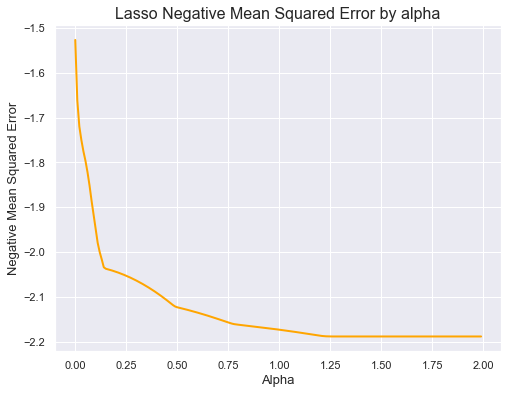

In [227]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=alpha_search_one, y=cv_scores_one, color="orange", linewidth=2)
plt.title("Lasso Negative Mean Squared Error by alpha", fontsize=16)
plt.xlabel("Alpha", fontsize=13)
plt.ylabel("Negative Mean Squared Error", fontsize=13)
plt.show()

##### Searching for Parameters: Part Two

In [228]:
alpha_search_two = np.arange(0, 0.02, 0.0001)
cv_scores_two = get_cv_scores(alpha_search_two)

In [229]:
optimal_index = np.argmax(cv_scores_two)
optimal_alpha = alpha_search_two[optimal_index]
print(f"The optimal alpha is {round(optimal_alpha, 4)} with a negative MSE of {round(max(cv_scores_two), 4)}")

The optimal alpha is 0.0003 with a negative MSE of -1.5063


#### Final Model

In [230]:
optimal_alpha=0.0003
final_lasso_model = Lasso(optimal_alpha)
final_lasso_model.fit(X_train, y_train["Price_trans"])

y_transformed_pred = final_lasso_model.predict(X_test)
y_pred = np.expm1(y_transformed_pred)

##### Model Evaluation Metrics

In [231]:
mae_lasso, mse_lasso, rmse_lasso = get_metrics(y_pred, y_true, "Lasso Regression Model")

============ Lasso Regression Model ============
Mean Absolute Error: 8637.1355
Mean Squared Error: 175933161.9914
Root Mean Squared Error: 13263.9799


##### Model Feature Importances

In [232]:
lasso_regression_coef = np.abs(final_lasso_model.coef_)
lasso_regression_features = final_lasso_model.feature_names_in_
lasso_regression_df = pd.DataFrame({"Feature": lasso_regression_features, "Importance": lasso_regression_coef})

**Top 20 Feature Importances**

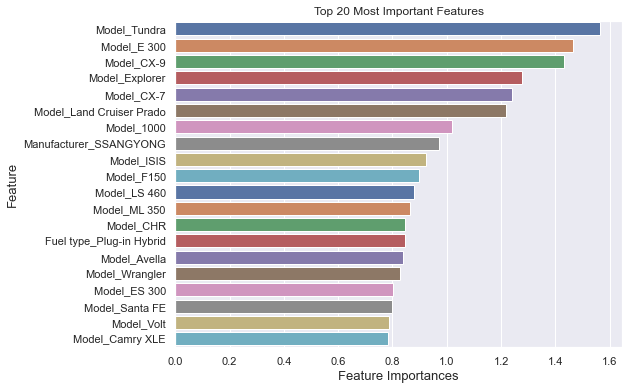

In [233]:
lasso_regression_sorted = lasso_regression_df.sort_values(by="Importance", ascending=False)
lasso_regression_sorted = lasso_regression_sorted.reset_index()
lasso_regression_sorted = lasso_regression_sorted.drop("index", axis=1)
plt.figure(figsize=(8, 6))
sns.barplot(data=lasso_regression_sorted[:20], x="Importance", y="Feature", palette="deep")
plt.title("Top 20 Most Important Features")
plt.xlabel("Feature Importances", fontsize=13)
plt.ylabel("Feature", fontsize=13)
plt.show()

**Features with zero importance**

In [234]:
import re

In [235]:
lasso_zero_imp = lasso_regression_sorted[lasso_regression_sorted["Importance"] == 0]
print(f"There are are {lasso_zero_imp.shape[0]} features that have a feature importance of 0.")

lasso_zero_stats_dict = {}
lasso_zero_imp_features = lasso_zero_imp["Feature"].tolist()

There are are 277 features that have a feature importance of 0.


In [236]:
model_names, manufacturer_names, drive_wheels = [], [], []
categories, colors, fuel_types = [], [], []
for feature in lasso_zero_imp_features: 
    if re.match(r"^Model", feature): 
        model = re.split("_", feature)[-1]
        model_names.append(model)
    elif re.match(r"^Manufacturer", feature): 
        manufacturer = re.split("_", feature)[-1]
        manufacturer_names.append(manufacturer)
    elif re.match(r"^Drive wheels", feature):
        drive_wheel = re.split("_", feature)[-1]
        drive_wheels.append(drive_wheel)
    elif re.match(r"^Category", feature):
        category = re.split("_", feature)[-1]
        categories.append(category)
    elif re.match(r"^Color", feature): 
        color = re.split("_", feature)[-1]
        colors.append(color)
    else: 
        fuel_type = re.split("_", feature)[-1]
        fuel_types.append(fuel_type)

In [237]:
print("Some sample names")
print("Model Names:", model_names[:10])
print("Manufacturer:", manufacturer_names[:10])
print("Drive Wheels:", drive_wheels)
print("Category:", categories)
print("Color:", colors)
print("Fuel Types:", fuel_types)

Some sample names
Model Names: ['Polo', 'Passat', 'Pathfinder', 'Picanto', 'Patriot', 'Patrol', 'ML 270', 'ML 320', 'Niro', 'ML 500']
Manufacturer: ['CITROEN', 'CHRYSLER', 'SUZUKI', 'ALFA ROMEO', 'BUICK', 'BENTLEY', 'PEUGEOT', 'ROLLS-ROYCE', 'ROVER', 'SAAB']
Drive Wheels: ['Rear']
Category: ['Jeep']
Color: ['Pink', 'Silver']
Fuel Types: ['Diesel', 'CNG']


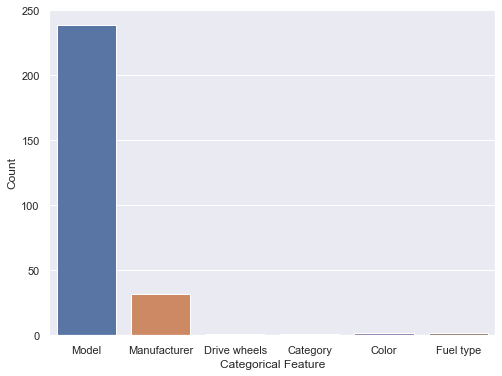

In [238]:
feature_count_dict = {}
feature_count_dict["Categorical Feature"] = [
    "Model", "Manufacturer", "Drive wheels", "Category", "Color", "Fuel type"
]
feature_count_dict["Count"] = [
    len(model_names), len(manufacturer_names), len(drive_wheels), len(categories),
    len(colors), len(fuel_types)
]
feature_counts = pd.DataFrame(feature_count_dict)

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_counts, x="Categorical Feature", y="Count")
plt.show()

In [239]:
X_train_trans = X_train.drop(lasso_zero_imp_features, axis=1)
X_test_trans = X_test.drop(lasso_zero_imp_features, axis=1)

### Random Forest Regression

#### Baseline Model

In [240]:
initial_random_forest = RandomForestRegressor(random_state=13, n_jobs=-1)
initial_random_forest.fit(X_train_trans, y_train["Price_trans"])

y_transformed_pred = initial_random_forest.predict(X_test_trans)
y_pred = np.expm1(y_transformed_pred)

mse = mean_squared_error(y_pred, y_test["Price"])

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 56710014.76074282


#### Hyperparameter Tuning

In [ ]:
rf_search_dict = {
    "n_estimators": [i for i in range(60, 160, 10)],
    "max_features": [i for i in range(30, 80, 10)],
}

In [ ]:
kfold = KFold(n_splits=8, shuffle=True, random_state=8)
cv_score = []
for i, (train_index, val_index) in enumerate(kfold.split(X_train_trans)):
    print(f"Fold {i+1}")
    train_data, val_data = X_train_trans.iloc[train_index], X_train_trans.iloc[val_index]
    train_target, val_target = y_train["Price_trans"].iloc[train_index], y_train["Price_trans"].iloc[val_index]
    
    rf_ht = RandomForestRegressor(random_state=13, n_jobs=-1, verbose=1)
    rf_ht_model = GridSearchCV(
        rf_ht, rf_search_dict, n_jobs=-1, cv=8, scoring="neg_mean_squared_error", verbose=3
    )
    search = rf_ht_model.fit(train_data, train_target)
    
    y_transformed_pred = search.predict(val_data)
    y_pred = np.expm1(y_transformed_pred)
    mse = mean_squared_error(y_pred, val_target)
    print(f"Mean Squared Error: {mse}, parameters: {search.best_params_}")
    cv_score.append(mse)
print(f"Average Overall MSE: {np.array(cv_score).mean()}")

Fold 1
Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.0s finished


Mean Squared Error: 347181051.3954935, parameters: {'max_features': 50, 'n_estimators': 150}
Fold 2
Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.0s finished


Mean Squared Error: 352922560.08353657, parameters: {'max_features': 50, 'n_estimators': 150}
Fold 3
Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 140 out of 140 | elapsed:    0.0s finished


Mean Squared Error: 360854366.9263671, parameters: {'max_features': 60, 'n_estimators': 140}
Fold 4
Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.0s finished


Mean Squared Error: 333486792.7741373, parameters: {'max_features': 40, 'n_estimators': 150}
Fold 5
Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.0s finished


Mean Squared Error: 354913445.8961395, parameters: {'max_features': 60, 'n_estimators': 150}
Fold 6
Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 130 out of 130 | elapsed:    0.0s finished


Mean Squared Error: 375554105.6975361, parameters: {'max_features': 70, 'n_estimators': 130}
Fold 7
Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 140 out of 140 | elapsed:    0.0s finished


Mean Squared Error: 363777666.4863537, parameters: {'max_features': 70, 'n_estimators': 140}
Fold 8
Fitting 8 folds for each of 50 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s


Mean Squared Error: 344382747.03480726, parameters: {'max_features': 40, 'n_estimators': 140}
Average Overall MSE: 354134092.0367964


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 140 out of 140 | elapsed:    0.0s finished


##### Our tuning results

In [330]:
folds = []
mses = []
max_features = [50, 50, 60, 40, 60, 70, 70, 40]
n_estimators = [150, 150, 140, 150, 150, 130, 140, 140]
best_model = None
best_mse = float('inf')
i = 1
for max_feature, n_estimator in zip(max_features, n_estimators): 
    folds.append(i)
    rf_model = RandomForestRegressor(
        random_state=13, n_jobs=-1, max_features=max_feature, n_estimators=n_estimator
    )
    rf_model.fit(X_train_trans, y_train["Price_trans"])
    
    y_transformed_pred = rf_model.predict(X_test_trans)
    y_pred = np.expm1(y_transformed_pred)
    
    mse = round(mean_squared_error(y_pred, y_test["Price"]), 4)
    mses.append(mse)
    if (mse < best_mse):
        best_model = rf_model
        best_mse = mse
    i += 1
    
best_rf_models = pd.DataFrame({
    "Fold": folds,
    "Max Features": max_features,
    "N Estimators": n_estimators,
    "MSE": mses
})

In [331]:
best_rf_models

,Fold,Max Features,N Estimators,MSE
0,1,50,150,5.710311e+07
1,2,50,150,5.710311e+07
2,3,60,140,5.586655e+07
3,4,40,150,5.875585e+07
4,5,60,150,5.588103e+07
5,6,70,130,5.570922e+07
6,7,70,140,5.563560e+07
7,8,40,140,5.895001e+07


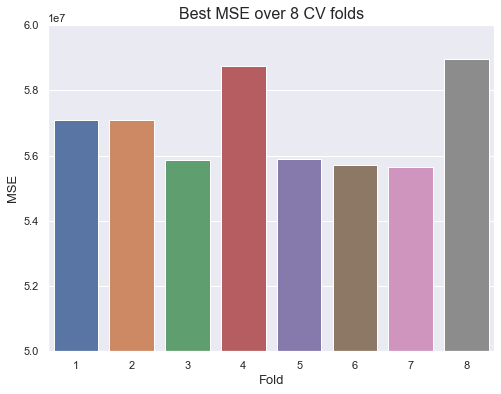

In [332]:
plt.figure(figsize=(8, 6))
sns.barplot(data=best_rf_models, x="Fold", y="MSE", palette="deep")
plt.ylim(5e7, 6e7)

plt.title("Best MSE over 8 CV folds", fontsize=16)
plt.xlabel("Fold", fontsize=13) 
plt.ylabel("MSE", fontsize=13)
plt.show()

#### Final Results

In [336]:
best_rf_models

,Fold,Max Features,N Estimators,MSE
0,1,50,150,5.710311e+07
1,2,50,150,5.710311e+07
2,3,60,140,5.586655e+07
3,4,40,150,5.875585e+07
4,5,60,150,5.588103e+07
5,6,70,130,5.570922e+07
6,7,70,140,5.563560e+07
7,8,40,140,5.895001e+07


In [337]:
lowest_index = np.argmin(best_rf_models["MSE"])
max_features = best_rf_models.iloc[lowest_index, 1]
n_estimators = best_rf_models.iloc[lowest_index, 2]

In [338]:
final_random_forest_model = RandomForestRegressor(random_state=13, n_jobs=-1, max_features=max_features, n_estimators=n_estimators, max_depth=None)
final_random_forest_model.fit(X_train_trans, y_train["Price_trans"])

y_transformed_pred = final_random_forest_model.predict(X_test_trans)
y_pred = np.expm1(y_transformed_pred)

##### Model Evaluation Metrics

In [339]:
rf_mae, rf_mse, rf_rmse = get_metrics(y_pred, y_true, "Random Forest Regression Model")

============ Random Forest Regression Model ============
Mean Absolute Error: 4064.3959
Mean Squared Error: 55635596.4091
Root Mean Squared Error: 7458.9273


##### Model Feature Importances

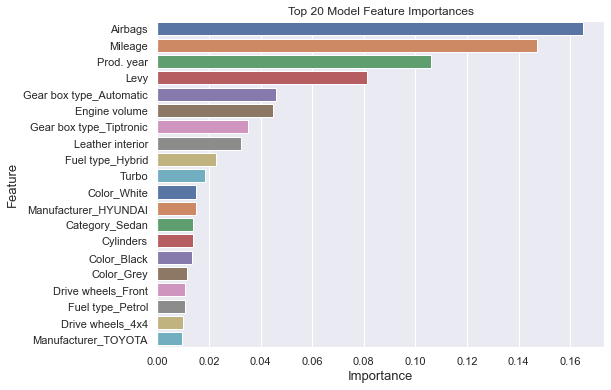

In [346]:
rf_features = final_random_forest_model.feature_names_in_
feature_importances = final_random_forest_model.feature_importances_
rf_feature_importances = pd.DataFrame({"Feature": rf_features, "Importance": feature_importances})
rf_importances_sorted = rf_feature_importances.sort_values(by="Importance", ascending=False).reset_index()
rf_importances_sorted = rf_importances_sorted.drop("index", axis=1)

plt.figure(figsize=(8, 6))
plt.title("Top 20 Model Feature Importances")
plt.xlabel("Feature", fontsize=13)
plt.ylabel("Feature", fontsize=13)
sns.barplot(data=rf_importances_sorted[:20], x="Importance", y="Feature", palette="deep")
plt.show()

### XGBoost

In [241]:
import xgboost as xgb

#### Baseline Model

In [242]:
initial_xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=13, n_jobs=-1)
initial_xgb_model.fit(X_train_trans, y_train["Price_trans"])

y_transformed_pred = initial_xgb_model.predict(X_test_trans)
y_pred = np.expm1(y_transformed_pred)

mse = mean_squared_error(y_pred, y_test["Price"])

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 81309131.87890738


#### Hyperparameter Tuning

In [243]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [244]:
search_space = {
    "max_depth": hp.uniform("max_depth", 2, 9),
    "learning_rate": hp.choice("eta", [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]),
    "gamma": hp.uniform("gamma", 1, 9),
    "n_estimators": hp.uniform("n_estimators", 50, 250),
    "min_child_weight": hp.uniform("min_child_weight", 0.2, 5),
    "lambdas": hp.uniform("lambdas", 0, 1.2),
    "alpha": hp.uniform("alpha", 0, 1.2)
}

In [248]:
def objective(space): 
    max_depth = int(space["max_depth"])
    eta = space["learning_rate"]
    gamma = int(space["gamma"])
    n_estimators = int(space["n_estimators"])
    min_child_weight = space["min_child_weight"]
    lambdas = space["lambdas"]
    alpha = space["alpha"]
    
    xgb_model = xgb.XGBRegressor(
        objective="reg:squarederror", random_state=5, n_jobs=-1, 
        max_depth=max_depth, eta=eta, gamma=gamma, n_estimators=n_estimators,
        min_child_weight=min_child_weight, alpha=alpha, reg_lambda=lambdas
    )
    
    score = cross_val_score(
        xgb_model, X_train, y_train["Price_trans"], scoring="neg_mean_squared_error", n_jobs=-1,
        cv=8
    ).mean()
    
    params = {
        "max_depth": max_depth,
        "eta": eta, 
        "gamma": gamma,
        "n_estimators": n_estimators,
        "min_child_weight": min_child_weight,
        "lambda": lambdas,
        "alpha": alpha
    }
    
    return {"loss": -score, "params": params, "status": STATUS_OK, "model": xgb_model}

In [249]:
trials = Trials()
best_hyperparams = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=120, trials=trials)

100%|██████████| 120/120 [55:34<00:00, 27.79s/trial, best loss: 0.7679673634257067]


##### Our tuning results

In [377]:
max_depths, etas, gammas, n_estimators, min_child_weights, lambdas, alphas, losses = [], [], [], [], [], [], [], []
for element in trials.results: 
    max_depths.append(element["params"]["max_depth"])
    etas.append(element["params"]["eta"])
    gammas.append(element["params"]["gamma"])
    n_estimators.append(element["params"]["n_estimators"])
    min_child_weights.append(element["params"]["min_child_weight"])
    lambdas.append(element["params"]["lambda"])
    alphas.append(element["params"]["alpha"])
    losses.append(element["loss"])

results_df = pd.DataFrame({
    "Iteration": [i for i in range(1, 121)],
    "Max Depth": max_depths, 
    "Eta": etas,
    "Gamma": gammas, 
    "No Estimators": n_estimators, 
    "Min Child Weights": min_child_weights, 
    "Lambda": lambdas,
    "Alpha": alphas,
    "MSE": losses
})

In [378]:
results_df.head()

,Iteration,Max Depth,Eta,Gamma,No Estimators,Min Child Weights,Lambda,Alpha,MSE
0,1,8,0.01,5,134,1.634414,0.078892,0.338769,6.065527
1,2,2,0.01,6,223,2.393499,0.703074,0.546743,2.326182
2,3,8,0.01,8,87,1.653104,1.051755,0.713550,14.114017
3,4,6,0.10,7,160,3.309014,0.402048,0.123252,0.939334
4,5,6,0.01,4,177,4.614916,0.243076,0.618496,3.206384


In [379]:
results_sorted[:10]

,Iteration,Max Depth,Eta,Gamma,No Estimators,Min Child Weights,Lambda,Alpha,MSE
65,66,8,0.2,1,238,0.458652,0.376301,1.099642,0.767967
69,70,8,0.2,1,204,0.339266,0.382465,1.103977,0.770428
68,69,8,0.2,1,206,0.642675,0.387960,1.096102,0.783996
55,56,8,0.2,1,244,0.518279,0.221737,0.558130,0.784071
74,75,8,0.2,1,191,0.674995,0.137905,1.081682,0.784724
66,67,8,0.2,1,220,0.521472,0.441714,0.868605,0.786300
61,62,8,0.2,1,238,1.700410,0.347520,0.943847,0.787822
100,101,7,0.2,1,197,1.062604,0.160286,0.719207,0.794520
108,109,7,0.2,1,193,0.960892,0.400712,0.852004,0.795288
30,31,8,0.2,1,75,3.915125,1.105020,0.010973,0.798036


Below is a plot that details the top ten lowest MSEs and top ten highest MSEs attained from hyperparameter tuning our XGBoost model.

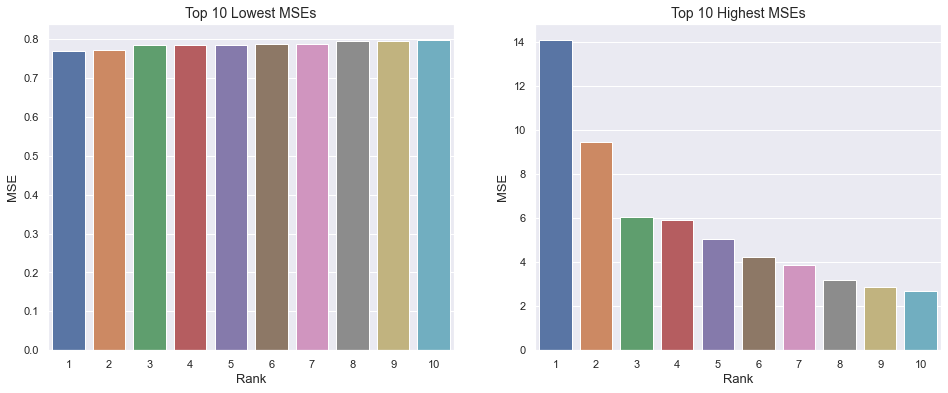

In [380]:
top_10_results = results_df.sort_values(by="MSE")[:10]
top_10_results["Rank"] = [i for i in range(1, 11)]
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_10_results, x="Rank", y="MSE", ax=axs[0])
axs[0].set_title("Top 10 Lowest MSEs", fontsize=14)
axs[0].set_xlabel("Rank", fontsize=13)
axs[0].set_ylabel("MSE", fontsize=13)
bottom_10_results = results_df.sort_values(by="MSE", ascending=False)[:10]
bottom_10_results["Rank"] = [i for i in range(1, 11)]
sns.barplot(data=bottom_10_results, x="Rank", y="MSE", ax=axs[1])
axs[1].set_title("Top 10 Highest MSEs", fontsize=14)
axs[1].set_xlabel("Rank", fontsize=13)
axs[1].set_ylabel("MSE", fontsize=13)
plt.show()

#### Final Results

In this section we present the results of our final XGBoost model. To do this, we first find the parameters attained by the best model (the lowest MSE).

In [381]:
optimal_index = np.argmin(results_df["MSE"])
trials.results[optimal_index]["params"]

{'max_depth': 8,
 'eta': 0.2,
 'gamma': 1,
 'n_estimators': 238,
 'min_child_weight': 0.4586519232395386,
 'lambda': 0.37630109895818625,
 'alpha': 1.0996422077861379}

##### Model Evaluation Metrics

We fit a final XGBoost model based on the hyperparameters above. 

In [383]:
best_model = trials.results[optimal_index]["model"]
best_model.fit(X_train_trans, y_train["Price_trans"])
y_transformed_pred = best_model.predict(X_test_trans)
y_pred = np.expm1(y_transformed_pred)

mae_xg, mse_xg, rmse_xg = get_metrics(y_pred, y_true, "XGBoost Model")

============ XGBoost Model ============
Mean Absolute Error: 4899.6862
Mean Squared Error: 72321253.8732
Root Mean Squared Error: 8504.1904


##### Feature Importance

In [292]:
from sklearn.inspection import permutation_importance

In [307]:
perm_importance = permutation_importance(best_model, X_test_trans, y_test["Price_trans"])
perm_importance_dict = {
    "Features": list(X_test_trans.columns), 
    "Permutation Importance": perm_importance["importances_mean"]
}
perm_importance_df = pd.DataFrame(perm_importance_dict)
perm_importance_sorted = perm_importance_df.sort_values(by="Permutation Importance", ascending=False)

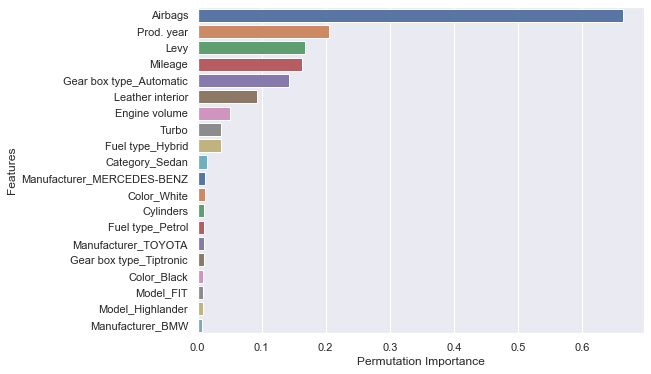

In [317]:
plt.figure(figsize=(8, 6))
sns.barplot(data=perm_importance_sorted[:20], x="Permutation Importance", y="Features", palette="deep")
plt.show()

## Results Summary

### Table of Results

The table below outlines the results of each of our four models: 
- Linear Ordinary Least Squares Regression
- Lasso Regression
- Random Forest Regression
- XGBoost Regression

In [373]:
models = ["OLS", "Lasso", "Random Forest", "XGBoost"]
maes = [round(mae_reg, 4), round(mae_lasso, 4), round(rf_mae, 4), round(mae_xg, 4)]
mses = [round(mse_reg, 4), round(mse_lasso, 4), round(rf_mse, 4), round(mse_xg, 4)]
rmses = [rmse_reg, rmse_lasso, rf_rmse, rmse_xg]


results_df = pd.DataFrame({
    "Models": models,
    "MAE": maes,
    "MSE": mses,
    "RMSE": rmses 
})

results_df

,Models,MAE,MSE,RMSE
0,OLS,8829.6283,2.620901e+08,16189.1971
1,Lasso,8637.1355,1.759332e+08,13263.9799
2,Random Forest,4064.3959,5.563560e+07,7458.9273
3,XGBoost,4899.6862,7.232125e+07,8504.1904
